### Data Description

The main data are in the csv file : order_data.csv

- createdAt : the order creation timestamp
- status : the order status (complete, canceled, etc.)
- restaurantName : the restaurant name attached to the order 
- pickupDeadline : timestamp corresponding to the ETA of the driver in the restaurant
- driverArrivedAtRestaurantAt : timestamp corresponding to the arrival time of the driver in the restaurant
- pickedAt : timestamp corresponding to the driver picking the food in the restaurant

The restaurant area data are in the csv file : restaurantarea_data.csv

- restaurantName : the restaurant name
- area : the speaking area for the restaurant

### Data Preparation 

Took the data from the 2021-01-25 to 2021-01-31 and considered only complete orders and removed the orders with missing timestamps.

### Questions To Find

- What are the most popular restaurants in number of orders ? 
- At which time of the day do we have a peak in average ? ex : between 11:00 and 12:00 ? between 18:00 and 19:00 ?
- For each restaurant compute the average waiting time for the driver : pickedAt - driverArrivedAtRestaurantAt
- If the waiting time is to high (> 6min), add a warning flag to the restaurant 
- Make a join with the restaurant's area data and compute the waiting time per area

## Python 

In [1]:
#importing all the libraries.
import datetime as dk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing and reaading the dataset
df = pd.read_csv("order_data.csv")
df

,createdAt,status,restaurantName,pickupDeadline,driverArrivedAtRestaurantAt,pickedAt
0,2021-01-23 02:47:48.591,complete,Red Pat - Craft Burgers & Beer,2021-01-23 11:56:00.000,2021-01-23 11:27:06.642,2021-01-23 11:53:01.951
1,2021-01-23 10:14:44.008,complete,GoodFood Basel,2021-01-23 10:38:00.000,2021-01-23 10:45:42.651,2021-01-23 11:02:28.023
2,2021-01-23 10:39:55.361,complete,Pizza Princess Zürich,2021-01-23 11:21:00.000,2021-01-23 10:51:28.457,2021-01-23 10:52:12.325
3,2021-01-23 11:16:31.605,complete,Pizza Princess Genève,2021-01-23 11:51:00.000,2021-01-23 11:17:25.408,2021-01-23 11:28:04.077
4,2021-01-23 11:20:53.335,error_payment,GoodFood Basel,2021-01-23 11:40:00.000,NaN,NaN
...,...,...,...,...,...,...
995,2021-02-01 20:29:04.022,complete,Maria - Rive Gauche,2021-02-01 20:44:00.000,2021-02-01 20:33:04.304,2021-02-01 20:46:30.010
996,2021-02-01 20:31:02.898,error_payment,Maria - Rive Gauche,2021-02-01 21:11:00.000,NaN,NaN
997,2021-02-01 20:36:39.308,complete,GoodFood Basel 2,2021-02-01 20:58:00.000,2021-02-01 20:57:58.060,2021-02-01 21:03:54.041
998,2021-02-01 21:36:09.875,complete,GoodFood Basel 2,2021-02-01 22:10:00.000,2021-02-01 21:44:05.642,2021-02-01 21:55:21.870


In [3]:
#taking the data from 2021-01-25 to 2021-01-31 & to remove the orders with missing timestamps.
df = df.loc[211:936]
df = df.dropna() 
df

,createdAt,status,restaurantName,pickupDeadline,driverArrivedAtRestaurantAt,pickedAt
211,2021-01-25 11:19:23.834,complete,Maria,2021-01-25 11:55:00.000,2021-01-25 11:59:53.332,2021-01-25 12:04:00.705
213,2021-01-25 11:28:04.531,complete,Red Pat - Craft Burgers & Beer,2021-01-25 11:58:00.000,2021-01-25 11:33:55.126,2021-01-25 11:52:19.660
216,2021-01-25 11:51:49.448,complete,Maria,2021-01-25 12:16:00.000,2021-01-25 12:31:29.500,2021-01-25 12:32:40.190
217,2021-01-25 11:54:21.555,complete,Pizza Princess SG,2021-01-25 12:28:00.000,2021-01-25 12:17:24.633,2021-01-25 12:28:07.927
218,2021-01-25 12:05:22.449,complete,Maria - Rive Gauche,2021-01-25 12:26:00.000,2021-01-25 12:22:17.156,2021-01-25 12:37:08.292
...,...,...,...,...,...,...
929,2021-01-31 21:00:58.124,complete,Maria,2021-01-31 21:26:00.000,2021-01-31 21:01:37.491,2021-01-31 21:08:26.121
931,2021-01-31 21:03:24.088,complete,Pizza Princess Genève,2021-01-31 21:25:00.000,2021-01-31 21:10:19.397,2021-01-31 21:16:29.255
932,2021-01-31 21:04:09.281,complete,Maria,2021-01-31 21:28:00.000,2021-01-31 21:10:07.251,2021-01-31 21:18:21.269
934,2021-01-31 21:36:02.966,complete,GoodFood Basel,2021-01-31 21:56:00.000,2021-01-31 21:38:40.523,2021-01-31 21:43:15.233


## Vizualisation 

<AxesSubplot:>

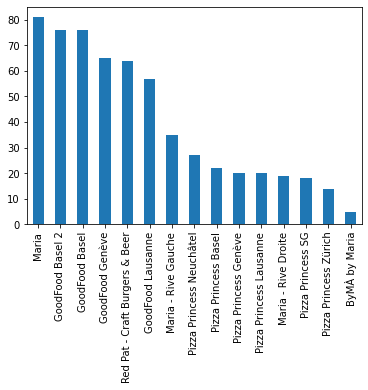

In [4]:
#Most popular restaurants in number of orders
df['restaurantName'].value_counts().plot.bar()

<AxesSubplot:xlabel='createdAt'>

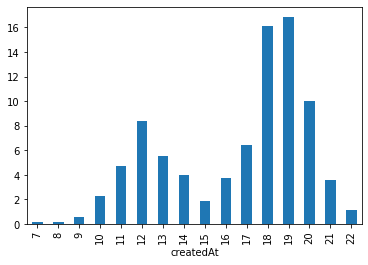

In [10]:
# At which time of the day do we have peak in average?
dk = pd.to_datetime(df['createdAt'])
x = df.groupby(dk.dt.date).groups.keys()
y = df.groupby([dk.dt.hour]).createdAt.count()
y = y/len(x)
y.plot.bar()

In [6]:
#For each restaurant compute the average waiting time for the driver : pickedAt - driverArrivedAtRestaurantAt
df['pickedAt'] = pd.to_datetime(df['pickedAt'])
df['driverArrivedAtRestaurantAt'] = pd.to_datetime(df['driverArrivedAtRestaurantAt'])
df['difference'] = df['pickedAt'] - df['driverArrivedAtRestaurantAt']
df['difference'] = df['difference'].dt.total_seconds().div(60)
df_diff = df.groupby('restaurantName').difference.mean()
type(df_diff)
df_diff = df_diff.to_frame().reset_index()
df_diff

,restaurantName,difference
0,ByMÀ by Maria,4.745097
1,GoodFood Basel,7.401970
2,GoodFood Basel 2,6.979253
3,GoodFood Genève,6.629968
4,GoodFood Lausanne,6.826350
5,Maria,5.119375
6,Maria - Rive Droite,9.739478
7,Maria - Rive Gauche,13.330015
8,Pizza Princess Basel,4.521867
9,Pizza Princess Genève,5.053183


In [7]:
#If the waiting time is too high (> 6min), add a warning flag to the restaurant 
df_diff['flag'] = df_diff['difference'].apply(lambda x: x > 6)
df_diff[['restaurantName','difference','flag',]]

,restaurantName,difference,flag
0,ByMÀ by Maria,4.745097,False
1,GoodFood Basel,7.401970,True
2,GoodFood Basel 2,6.979253,True
3,GoodFood Genève,6.629968,True
4,GoodFood Lausanne,6.826350,True
5,Maria,5.119375,False
6,Maria - Rive Droite,9.739478,True
7,Maria - Rive Gauche,13.330015,True
8,Pizza Princess Basel,4.521867,False
9,Pizza Princess Genève,5.053183,False


<AxesSubplot:xlabel='area'>

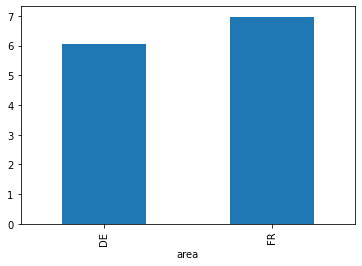

In [15]:
#Make a join with the restaurant's area data and compute the waiting time per area
df1 = pd.read_csv("restaurantarea_data.csv")
t = df_diff.merge(df1, how='inner',left_on='restaurantName',right_on='restaurantName')
t1 = t.groupby('area').difference.mean()
t1.plot.bar()

## SQL 

The code to build the schema can be copy paste from the file : building_schema.txt

In [ ]:
#to remove the orders with missing timestamps.
DELETE FROM order_table WHERE status = 'error_payment';
SELECT * FROM order_table;

In [ ]:
#Most popular restaurants in number of orders
SELECT restaurantname, COUNT(*) 
FROM order_table 
GROUP BY restaurantname;

In [ ]:
# At which time of the day do we have peak in average?
SELECT COUNT(*),HOUR  FROM (SELECT EXTRACT(HOUR FROM createdat) AS HOUR FROM order_table) temp group by temp.hour
order by count(*) desc limit 1;

In [ ]:
#For each restaurant compute the average waiting time for the driver : pickedAt - driverArrivedAtRestaurantAt
SELECT restaurantname,AVG ((DATE_PART('day', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)* 24
+ DATE_PART('hour', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)) * 60
+DATE_PART('minute', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)) AS avg_wait_time
FROM order_table 
GROUP BY restaurantname;

In [ ]:
#If the waiting time is to high (> 6min), add a warning flag to the restaurant
SELECT restaurantname,
CASE 
WHEN (DATE_PART('day', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)* 24 
+ DATE_PART('hour', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)) * 60 
+DATE_PART('minute', pickedat::timestamp - driverarrivedatrestaurantat::timestamp) > 6 THEN True
ELSE False
END
AS warning_Flag 
FROM order_table ;

In [ ]:
#Make a join with the restaurant's area data and compute the waiting time per area
SELECT restaurantarea_table.area AS Area, AVG ((DATE_PART('day', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)* 24
+ DATE_PART('hour', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)) * 60
+DATE_PART('minute', pickedat::timestamp - driverarrivedatrestaurantat::timestamp)) AS avg_wait_time
FROM order_table LEFT JOIN restaurantarea_table ON order_table.restaurantname = restaurantarea_table.restaurantname
GROUP BY  area;